/mnt/data/user_liangzhiyu/envs/fedcsl/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch [1/100], Step [100/938], Loss: 1.0755
Epoch [1/100], Step [200/938], Loss: 0.6967
Epoch [1/100], Step [300/938], Loss: 0.4040
Epoch [1/100], Step [400/938], Loss: 0.5804
Epoch [1/100], Step [500/938], Loss: 0.5115
Epoch [1/100], Step [600/938], Loss: 0.4459
Epoch [1/100], Step [700/938], Loss: 0.3438
Epoch [1/100], Step [800/938], Loss: 0.2511
Epoch [1/100], Step [900/938], Loss: 0.2335
Test Accuracy: 90.82%
Epoch [2/100], Step [100/938], Loss: 0.2681
Epoch [2/100], Step [200/938], Loss: 0.2922
Epoch [2/100], Step [300/938], Loss: 0.5008
Epoch [2/100], Step [400/938], Loss: 0.2217
Epoch [2/100], Step [500/938], Loss: 0.2483
Epoch [2/100], Step [600/938], Loss: 0.1677
Epoch [2/100], Step [700/938], Loss: 0.3370
Epoch [2/100], Step [800/938], Loss: 0.3389
Epoch [2/100], Step [900/938], Loss: 0.1989
Test Accuracy: 92.69%
Epoch [3/100], Step [100/938], Loss: 0.2270
Epoch [3/100], Step [200/938], Loss: 0.2666
Epoch [3/100], Step [300/938], Loss: 0.1596
Epoch [3/100], Step [400/938], L

/mnt/data/user_liangzhiyu/envs/fedcsl/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/mnt/data/user_liangzhiyu/envs/fedcsl/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/mnt/data/user_liangzhiyu/envs/fedcsl/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/mnt/data/user_liangzhiyu/envs/fedcsl/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/mnt/data/user_liangzhiyu/envs/fedcsl/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: Us

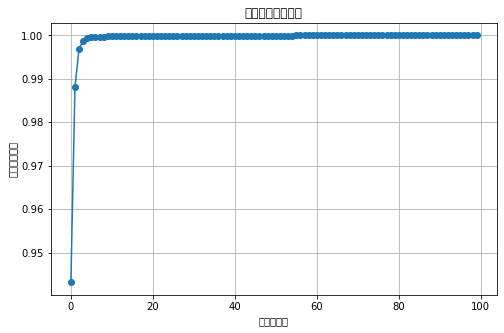

/mnt/data/user_liangzhiyu/envs/fedcsl/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/mnt/data/user_liangzhiyu/envs/fedcsl/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/mnt/data/user_liangzhiyu/envs/fedcsl/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/mnt/data/user_liangzhiyu/envs/fedcsl/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/mnt/data/user_liangzhiyu/envs/fedcsl/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: Us

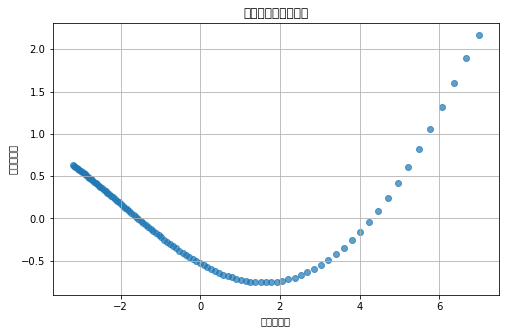

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# 设备配置（GPU 或 CPU）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 超参数设置
batch_size = 64
learning_rate = 0.01
num_epochs = 100

# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 将图像转换为张量
    transforms.Normalize((0.1307,), (0.3081,))  # 标准化（MNIST 均值和标准差）
])

# 加载 MNIST 数据集
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# 定义模型
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # 输入层到隐藏层
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)      # 隐藏层到输出层

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # 展平图像
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 初始化模型、损失函数和优化器
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()  # 交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 记录参数变化
param_history = []

# 训练函数
def train(epoch):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        # 前向传播
        outputs = model(data)
        loss = criterion(outputs, target)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # 打印日志
        if (batch_idx + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    # 在每个 epoch 结束时记录模型参数
    params = torch.cat([p.view(-1).detach().cpu() for p in model.parameters()])
    param_history.append(params.numpy())

# 测试函数
def test():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# 主程序：训练和测试
for epoch in range(num_epochs):
    train(epoch)
    test()

# 将参数历史记录堆叠成一个二维数组
param_history = np.array(param_history)

# 使用 PCA 进行降维分析
pca = PCA()
pca.fit(param_history)

# 输出前几个主成分解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_
print("前几个主成分解释的方差比例:", explained_variance_ratio[:10])

# 绘制累计方差比例曲线
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel("主成分数量")
plt.ylabel("累计方差比例")
plt.title("累计方差比例曲线")
plt.grid()
plt.show()

# 提取前两个主成分并绘制分布图
principal_components = pca.transform(param_history)
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]

plt.figure(figsize=(8, 5))
plt.scatter(pc1, pc2, alpha=0.7)
plt.xlabel("第一主成分")
plt.ylabel("第二主成分")
plt.title("参数变化的低维分布")
plt.grid()
plt.show()